## Observations and Insights 

1. According to the bar plot, the dataset contains the most data from drug regimens Capomulin and Ramicane. 
2. This study had a pretty even sample size of male and female mice, with males being 51% of the study and females being 49%.
3. Capomulin has the lowest average tumor volume. This would make it seem that it's the most successful regimen in the trial, but with 2 outliers with very low tumor volumes, this sends the average down. 
4. Median tumor volume of mice in the Capomulin trial is drastically lower than th other drugs, so with the low mean and low median, and a low standard deviation in comparison to the rest of the dataset. We can conclude that Capomulin is the most successful drug out of the 10 regimens in the study.  

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_frame = pd.DataFrame()
mouse_frame = mouse_metadata.merge(study_results, on='Mouse ID', how='left')
# Display the data table for preview
mouse_frame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
mice_count = len(mouse_frame['Mouse ID'].unique())
mice_count

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_frame.loc[mouse_frame.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate=pd.DataFrame(duplicate_mice)
all_duplicate

,0
0,g989


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_frame[mouse_frame['Mouse ID'].isin(duplicate_mice)==False]

In [28]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df['Mouse ID'].unique())
mice_count_clean

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single = clean_df.groupby('Drug Regimen')
summary_df_2 = single.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

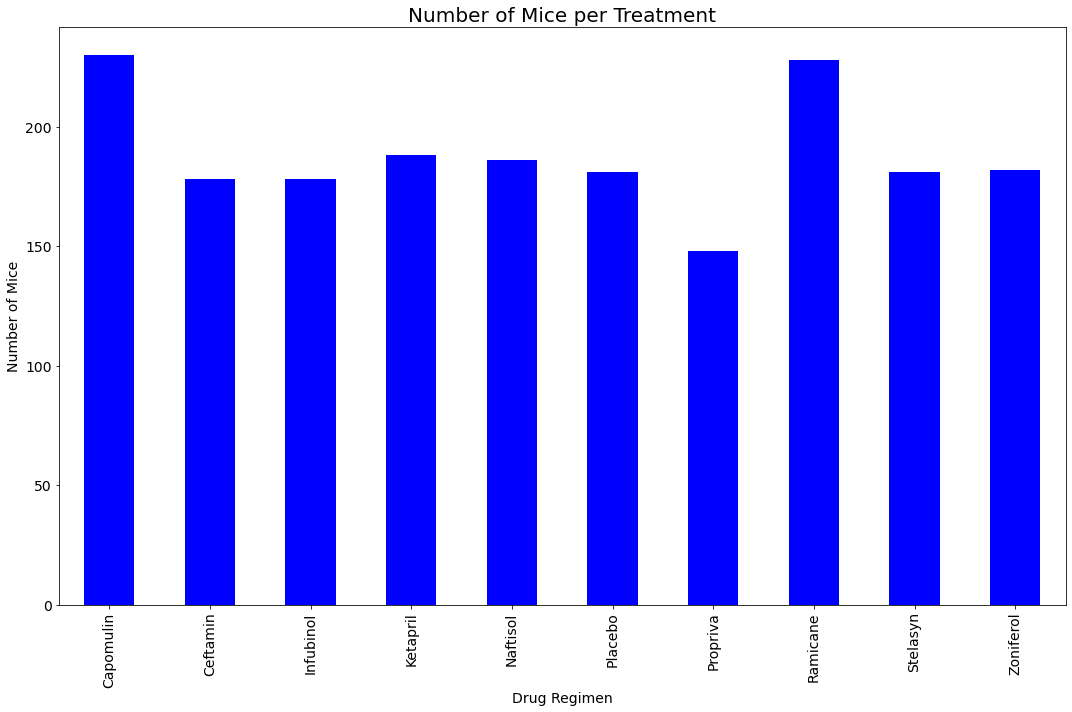

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mouse_treatments = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_mouse = mouse_treatments.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.savefig("images/bar_plot.png",dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


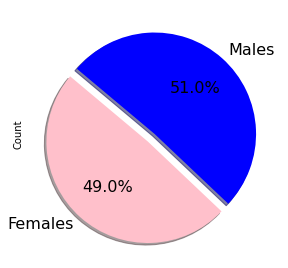

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

# Create gender dataframe with only sex and mouse ID
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Explode variables
explode = (0.1, 0)

# Create plot 
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y="Count", ax=ax1, autopct='%1.1f%%', shadow=True, labels=labels, legend = False, fontsize=16, colors=colors, explode=explode, startangle=140)
plt.savefig("images/pie_1.png",dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
# Convert Columns into lists
gender_count = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[922, 958]

In [35]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

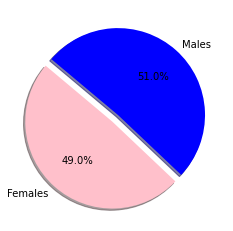

In [36]:
# Create pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/pie_2.png",dpi=300, bbox_inches='tight')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
four_regimens = four_regimens.sort_values(["Timepoint"], ascending=False)

four_regimens


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_list = four_regimens['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for regimen in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    regimen_df = four_regimens.loc[four_regimens['Drug Regimen'] == regimen]
    
    tumor_vols = regimen_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vols)
    
    # add subset 
    
    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {regimen} tumors: {lowerq}")
    print(f"The upper quartile of {regimen} tumors: {upperq}")
    print(f"The interquartile range of {regimen} tumors: {iqr}")
    print(f"The median of {regimen} tumors: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-----------------------------------------------")
    print("")
    

The lower quartile of Infubinol tumors: 47.3123533
The upper quartile of Infubinol tumors: 57.314443967500004
The interquartile range of Infubinol tumors: 10.002090667500006
The median of Infubinol tumors: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
-----------------------------------------------

The lower quartile of Ramicane tumors: 36.67463458499999
The upper quartile of Ramicane tumors: 45.0
The interquartile range of Ramicane tumors: 8.325365415000007
The median of Ramicane tumors: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
-----------------------------------------------

The lower quartile of Capomulin tumors: 37.685932865
The upper quartile of Capomulin tumors: 45.0
The interquartile range of Capomulin tumors: 7.314067135000002
The median of Capomulin tumors: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values abov

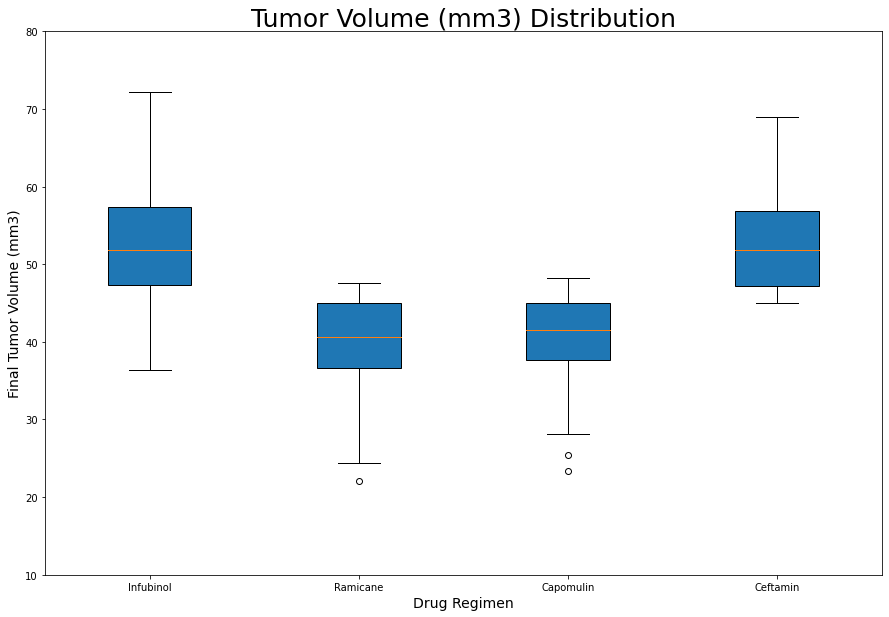

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume (mm3) Distribution',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_data, labels=regimen_list, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.savefig("images/box_plot.png",dpi=300, bbox_inches='tight')
plt.show()

## Line and Scatter Plots

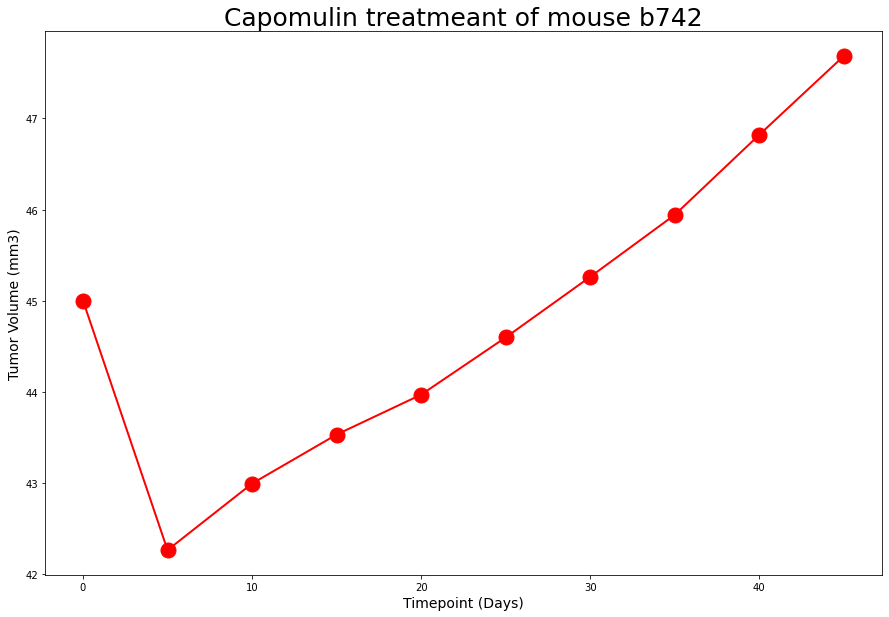

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = four_regimens.loc[four_regimens['Drug Regimen'] == "Capomulin"]
line_df = cap_df.loc[cap_df["Mouse ID"] == "i557",:]

# x axis is set to timepoint values
x_axis = line_df["Timepoint"]

# y values are tumor volumes
tumor_size = line_df["Tumor Volume (mm3)"]

# Create plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumor_size, linewidth=2, markersize=15, marker="o", color="red")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.savefig("images/line_plot.png",dpi=300, bbox_inches='tight')
plt.show()

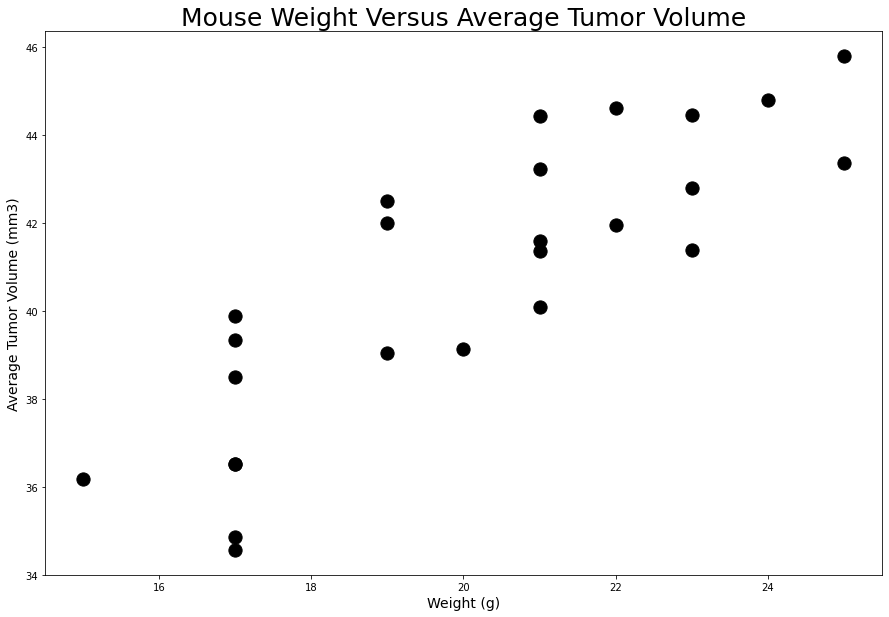

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_cap_vol = cap_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'],s=175, color="black")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
plt.savefig("images/scatter_plot.png",dpi=300, bbox_inches='tight')
plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [43]:
x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:0.9544396890241051
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694724
pandas (Correlation coefficient):0.84
stderr:0.12754359033201315
y = 0.95x + 21.55


The r-squared is: 0.7088568047708727


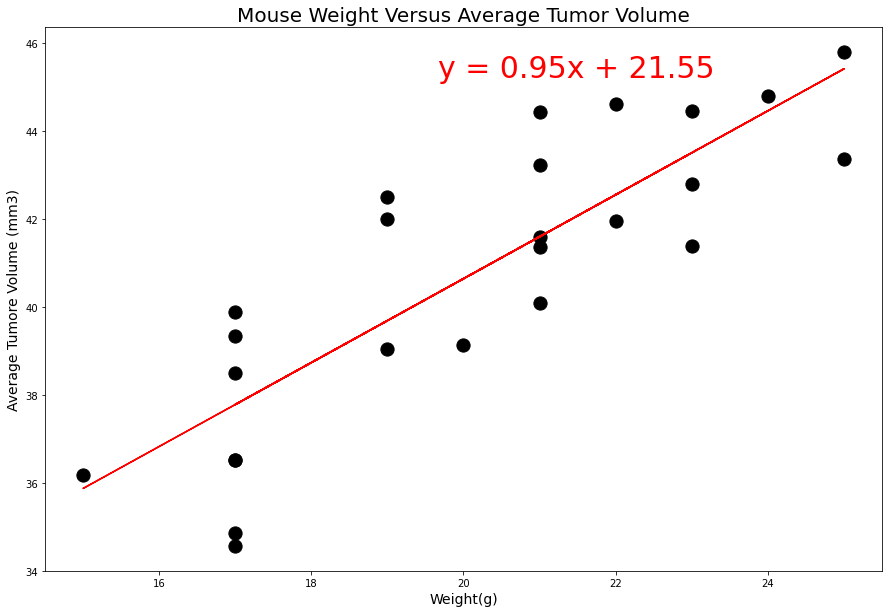

In [44]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="black")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_equation, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("images/correlation_plot.png",dpi=300, bbox_inches='tight')
plt.show()